In [22]:
import warnings
warnings.filterwarnings(action='ignore')

from glob import glob
import json

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

In [23]:
def load_data(file, sheet_name):
    return pd.read_excel(file, sheet_name=sheet_name)

In [24]:
def load_all_data():
    files = glob('/Users/sabin/Documents/Project/뉴스와 소셜데이터 기반 이슈 분석 및 시각화/Trend-analysis/dataset/임대차3법(54,752건)/*.xlsx')
    df = pd.DataFrame()
    for file in files:
        df = df.append(load_data(file, '트위터'))
    return df

twitter = load_all_data()

## 트위터 Sheet

In [25]:
twitter.isna().sum()

Unnamed: 0    0
Unnamed: 1    0
Unnamed: 2    0
dtype: int64

In [26]:
twitter.columns = twitter.iloc[0]
twitter.drop(0, inplace=True, axis=0)
twitter = twitter.dropna(axis=0, how='any')
twitter = twitter[~twitter['내용'].str.contains('http')]
twitter = twitter[twitter['내용'].str.contains('[가-힣]')]
twitter = twitter[twitter['내용'].str.len() < 1000]

print(twitter.shape)
twitter.head()

(2496, 3)


,작성일,작성자,내용
3,2020/08/01,aa4wFmEnmw7I3nT,임대차3법을 막으려년 임대차3법이 무엇이 잘못됐는지 알아야 하지 않을까?\n임대차3...
4,2020/08/01,kicoo77,@TheMinjoo_Kr * 편법 탈법으로 투기하는 자들이 나쁜가? 투기로 부동산가...
5,2020/07/31,live_suyongso,오늘들은 임대차3법 관련 썰\n\n10월에 전세권자랑 전세금 올리고 재계약 할랬는데...
10,2020/12/12,uSTlqFPVb730Qa8,아동학대 발언하신 분이 임대차3법 발의한 박주민보다 욕을 더 먹는 게 말이 된다고 ...
11,2020/12/05,Vigilante_Aiden,아니 씨발 임대차 3법은 도대체 왜 단독으로 강행 통과시킨 건데? 그 때 임대차 3...


## Key phrase
* ngram_range=(2,5)

In [31]:
def get_tfidf(ngram_range=(2,5), max_features=1000):
    vocab = {}
    tfidf = TfidfVectorizer(ngram_range=ngram_range, max_features=max_features)
    
    for content in twitter['내용']:
        if len(content) < 100:
            continue
        if content is None:
            continue
        new_tfidf = tfidf.fit_transform(content.split(' '))
        new_tfidf = new_tfidf.toarray()
        new_tfidf = pd.DataFrame(new_tfidf, columns=tfidf.get_feature_names())
        new_tfidf = new_tfidf.sum(axis=0).sort_values(ascending=False)[:10]
        for key, value in new_tfidf.items():
            if key in vocab:
                vocab[key] += value
            else:
                vocab[key] = value
        
    return vocab

In [32]:
vocab = get_tfidf(ngram_range=(2,5))

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [ ]:
vocab = sorted(vocab.items(), key=lambda x: x[1], reverse=True)

In [ ]:
vocab

[]

In [ ]:
with open('tfdif_트위터_vocab_keyphrase.json', 'w') as f:
    json.dump(vocab[58:], f)

(-0.5, 799.5, 599.5, -0.5)

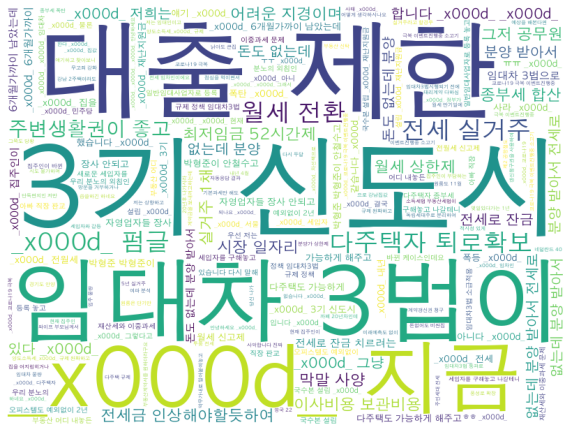

In [ ]:
wordcloud = WordCloud(background_color='white', width=800, height=600, font_path='/Library/Fonts/AppleGothic.ttf').generate_from_frequencies(dict(vocab[58:]))
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.axis('off')

In [ ]:
wordcloud.to_file('tfidf_트위터_wordcloud_keyphrase.png')

## Key Word

In [ ]:
keyword = get_tfidf(ngram_range=(1,2))
keyword = sorted(keyword.items(), key=lambda x: x[1], reverse=True)
keyword

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [ ]:
with open('tfdif_트위터_keyword.json', 'w') as f:
    json.dump(keyword[:60], f)

(-0.5, 799.5, 599.5, -0.5)

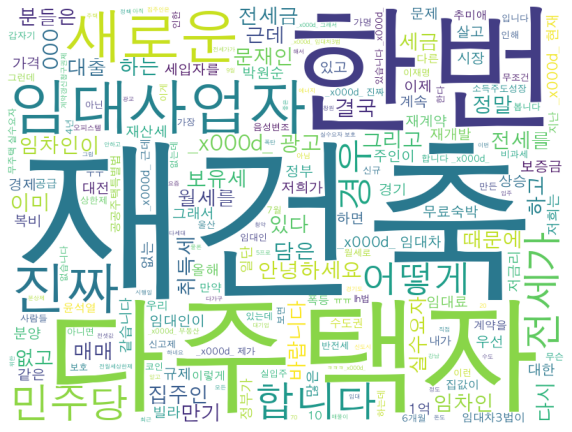

In [ ]:
wordcloud = WordCloud(background_color='white', width=800, height=600, font_path='/Library/Fonts/AppleGothic.ttf').generate_from_frequencies(dict(keyword[60:]))
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.axis('off')

In [ ]:
wordcloud.to_file('tfid_트위터_wordcloud_keyword.png')

# TFDIF

We couldn't figure the relationship between the words linearly

as we can see in the graph above